<a href="https://colab.research.google.com/github/Fercaspe/Data-UY/blob/main/Diabetes_DataSet_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Construcción de un pipeline para realizar un modelo de predicción

## Contexto
El conjunto de datos con el que trabajaremos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales de Estados Unidos. El objetivo del ejercicio es predecir si un paciente tiene diabetes o no, basándose en ciertas mediciones diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones en la selección de estas instancias a partir de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de edad y de ascendencia indígena Pima.

## Contenido
El conjunto de datos consta de varias variables predictoras médicas y una variable objetivo, denominada Outcome (resultado). Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su índice de masa corporal (IMC), nivel de insulina, edad, entre otros.

## Referencia original
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/gustavovazquez/datasets/refs/heads/main/diabetes_copy.csv")
df.head()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.set_index("ID", inplace = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
ID,,,,,,,,,
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


<Axes: >

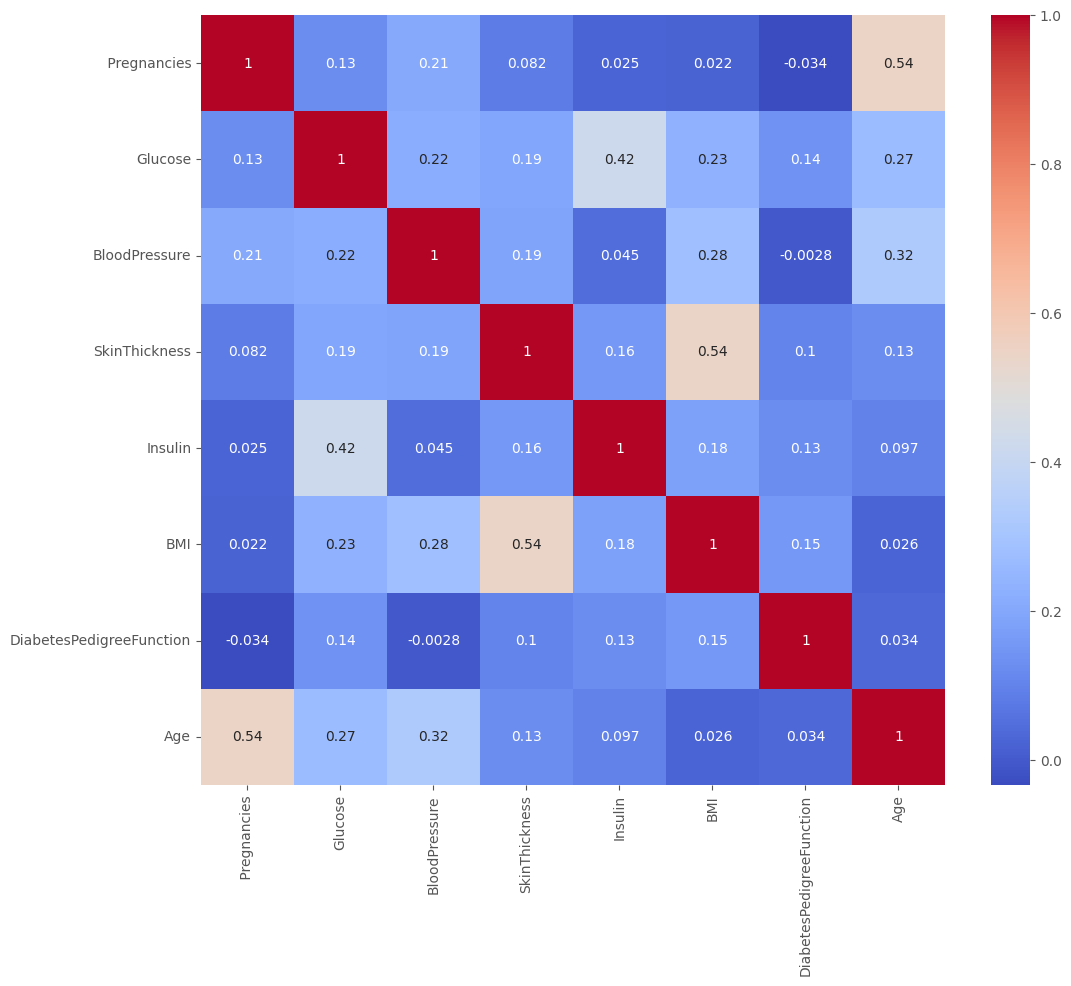

In [ ]:
# Chequeamos correlación

corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap = "coolwarm")




No hay indicios de correlación entre las variables independientes

[]

<Figure size 1500x1000 with 0 Axes>

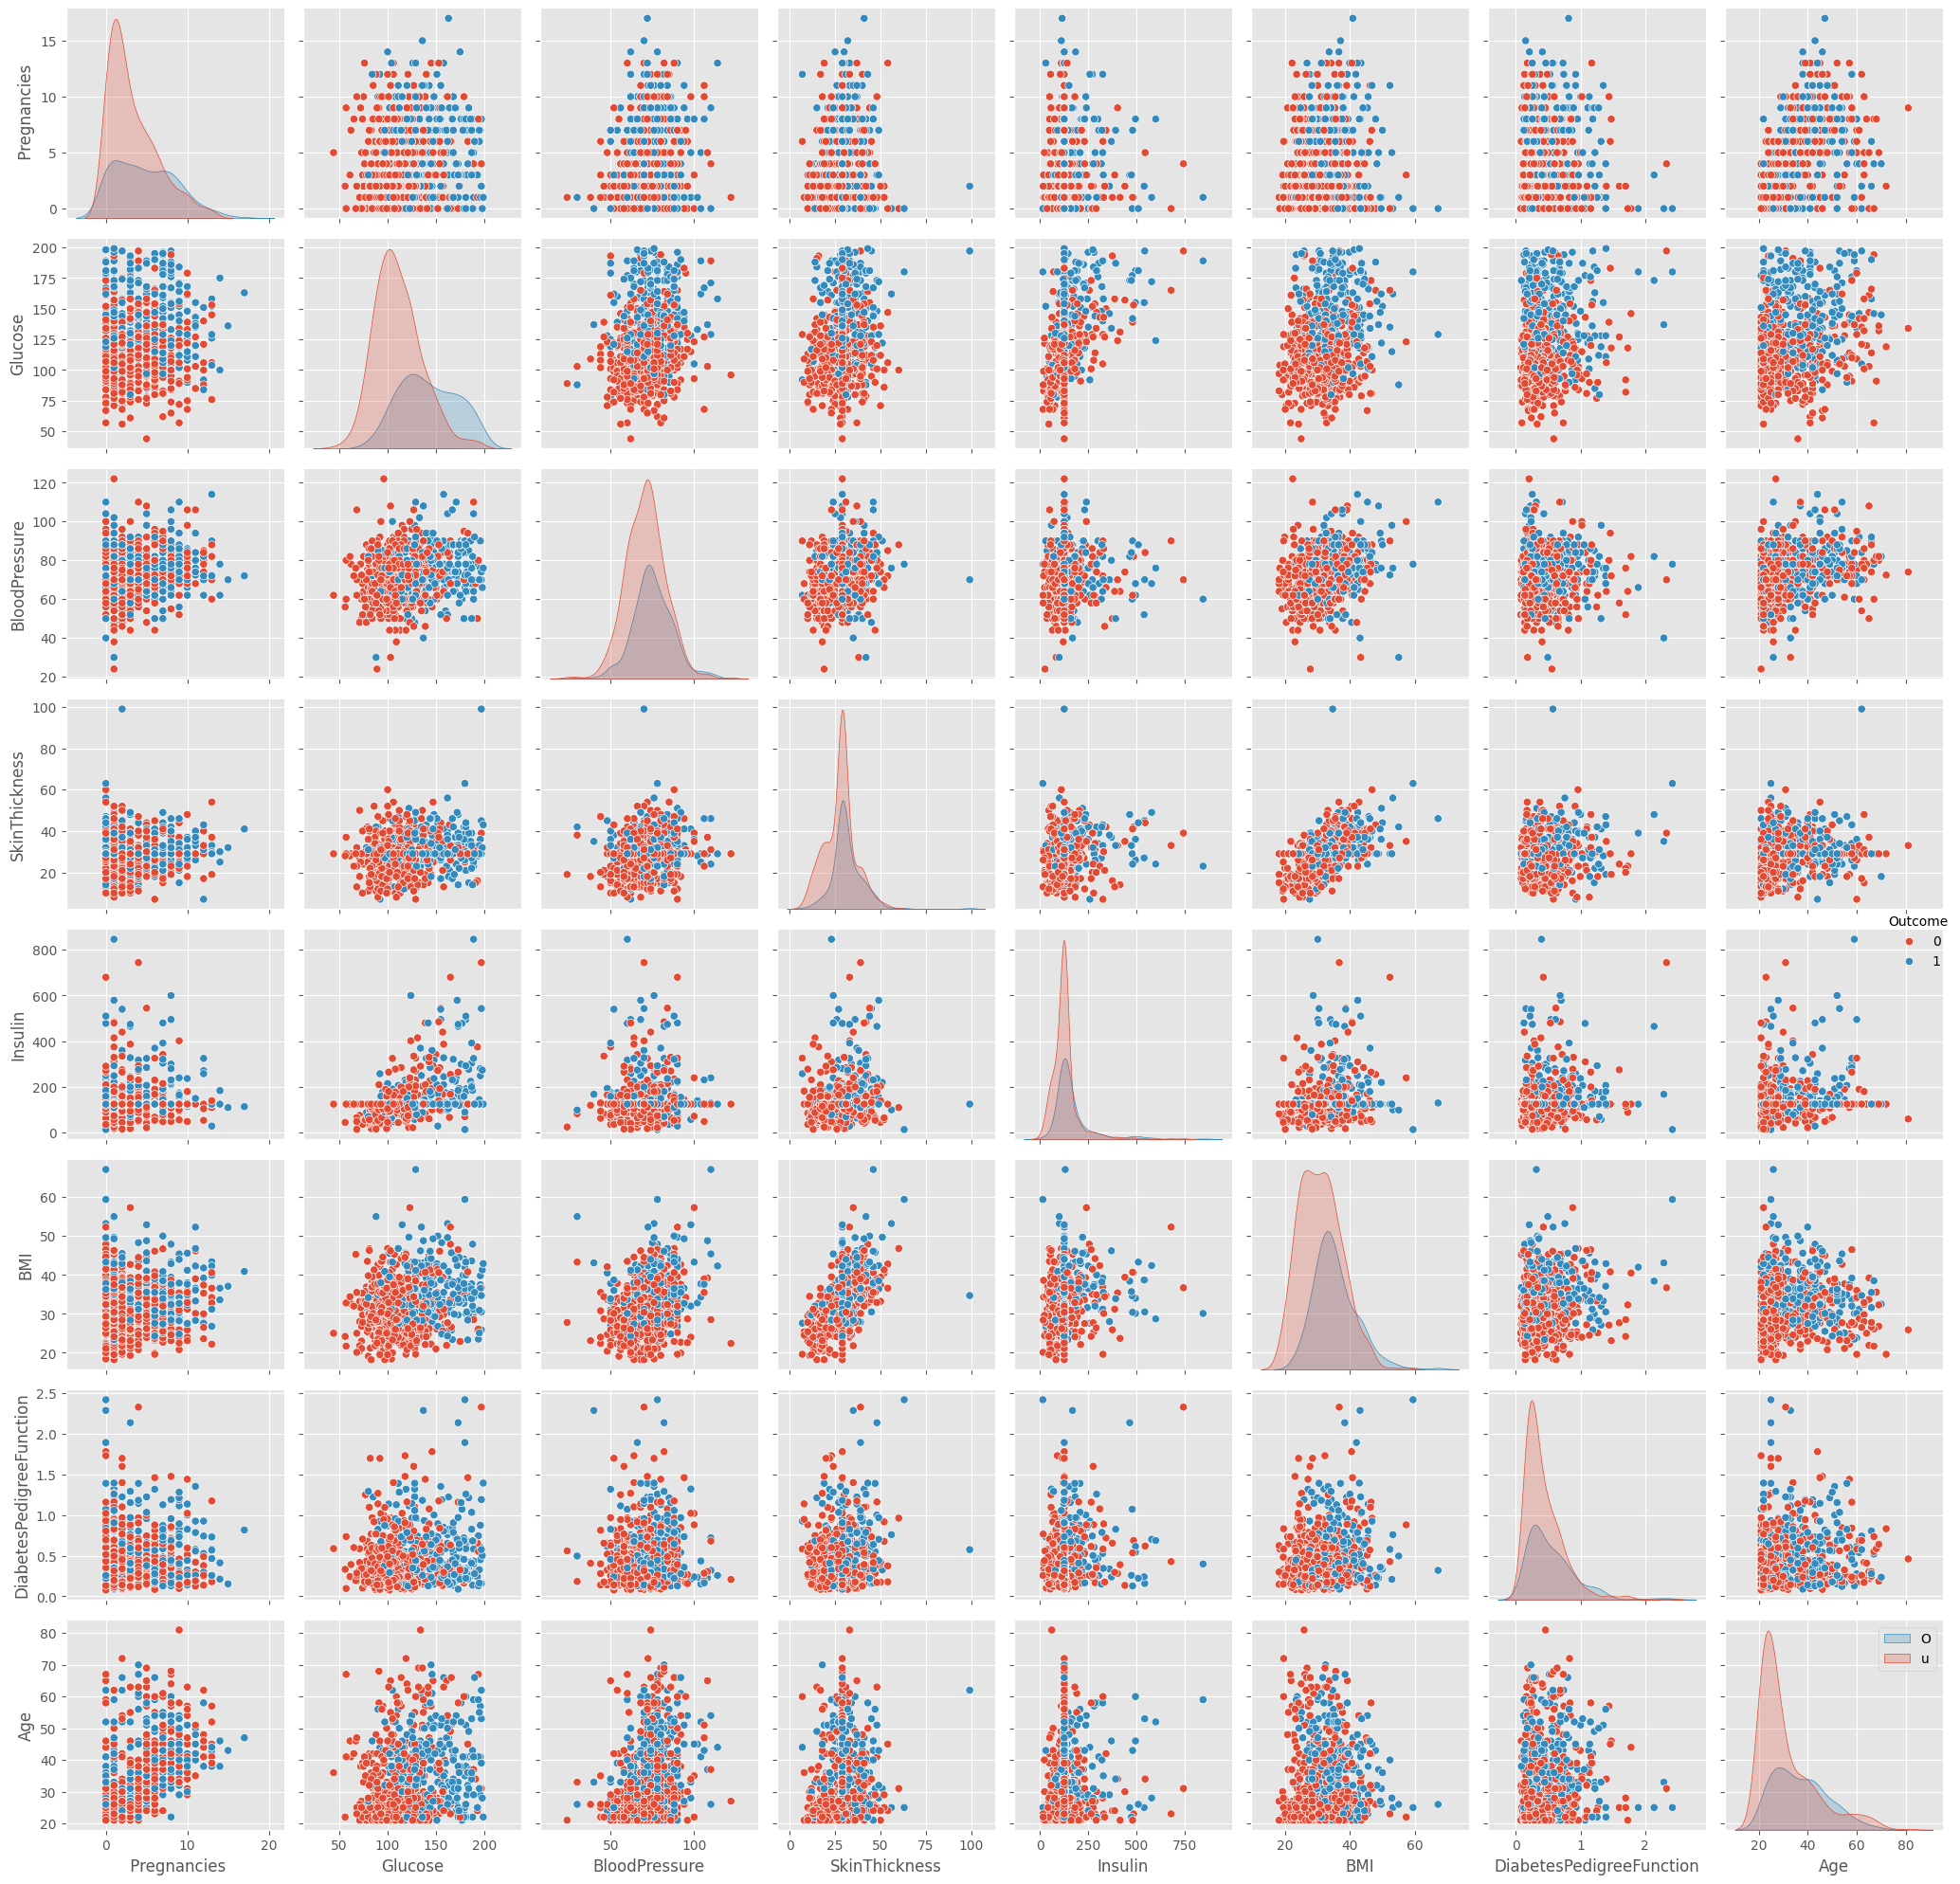

In [ ]:
# Para mostrar múltiples distribuciones por pares en un conjunto de datos, podemos usar la función pairplot().
# Esto muestra la relación para las combinaciones de n variables tomadas de a dos (n, 2) del DataFrame (los gráficos diagonales son los gráficos de distribución para cada clase).

plt.figure(figsize=(15,10))
sns.pairplot(df,hue="Outcome")

plt.legend("Outcome")
plt.tight_layout()
plt.plot()

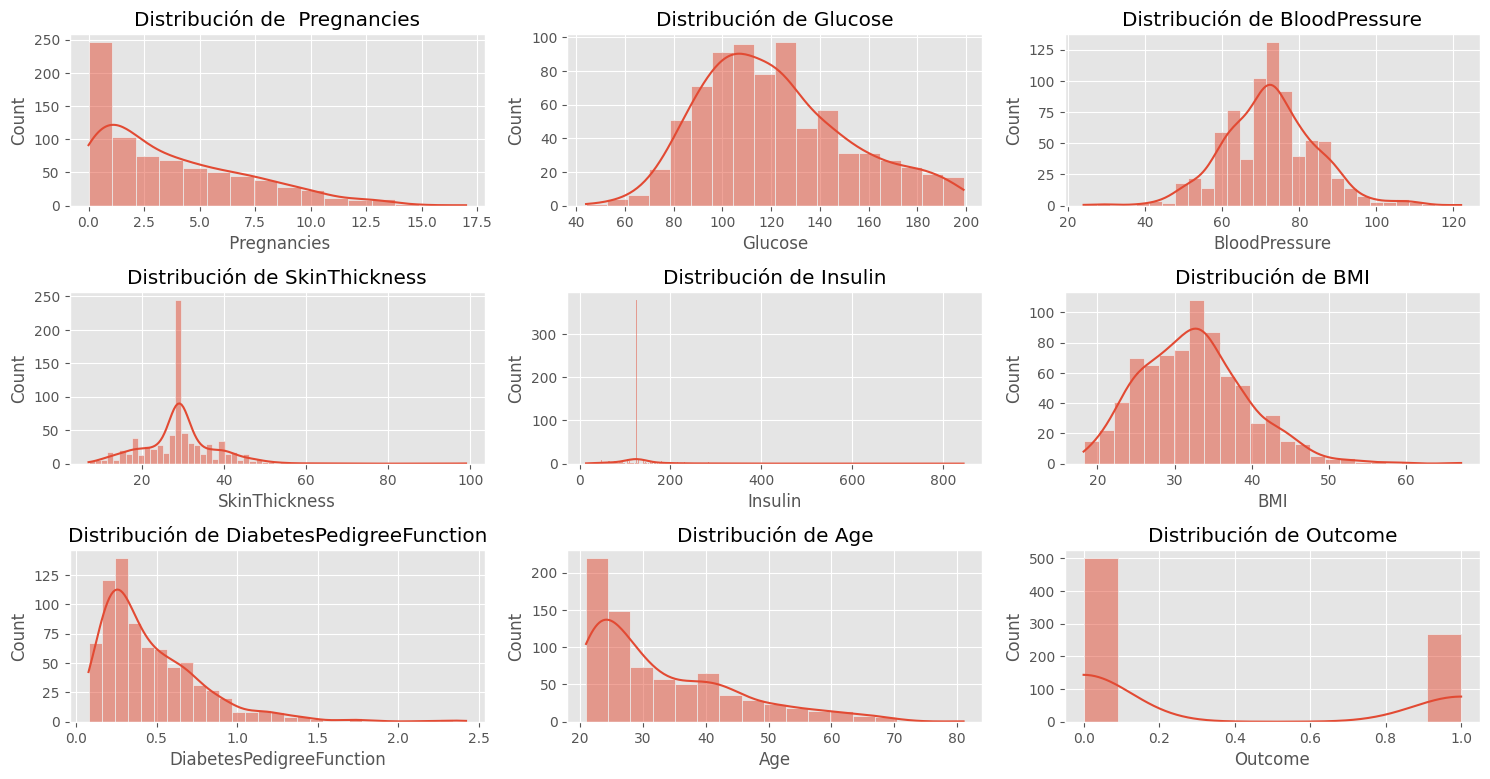

In [ ]:
# podemos ver el histograma de cada variable y superponer la kernel density estimation (KDE) para una mejor visualización ("suaviza" los histogramas)

plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribución de {col}")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

Un diagrama boxplot muestra la distribución de datos cuantitativos de una manera que facilita las comparaciones entre variables. El cuadro muestra los cuartiles del conjunto de datos mientras que los extremos se extienden para mostrar el resto de la distribución. El diagrama de caja es una forma estandarizada de mostrar la distribución de datos basada en el resumen de cinco métricas:

- Mínimo
- Primer cuartil
- mediana
- Tercer cuartil
- Máximo.

En el diagrama de caja más simple, el rectángulo central abarca desde el primer cuartil hasta el tercer cuartil (el rango intercuartílico o IQR). Un segmento dentro del rectángulo muestra la mediana y los "extremos" arriba y abajo del cuadro muestran las ubicaciones del mínimo y el máximo.

In [ ]:
fig = px.box(df, x="Outcome", y=" Pregnancies", color="Outcome")
fig.show()

In [ ]:
fig = px.box(df, x="Outcome", y="Glucose", color="Outcome")
fig.show()

In [ ]:
fig = px.box(df, x="Outcome", y="BloodPressure", color="Outcome")
fig.show()

In [ ]:
fig = px.box(df, x="Outcome", y="SkinThickness", color="Outcome")
fig.show()

In [ ]:
fig = px.box(df, x="Outcome", y="Insulin", color="Outcome")
fig.show()


In [ ]:
fig = px.box(df, x="Outcome", y="BMI", color="Outcome")
fig.show()

In [ ]:
fig = px.box(df, x="Outcome", y="DiabetesPedigreeFunction", color="Outcome")
fig.show()

In [ ]:
fig = px.box(df, x="Outcome", y="Age", color="Outcome")
fig.show()

# Chequeando Valores Nulos (NaN)

In [ ]:
# Checking for Type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0    Pregnancies              768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


In [ ]:
# Checking for NULLs in the data
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# extraemos el target

y = df["Outcome"].values
df.drop("Outcome", axis=1, inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
ID,,,,,,,,
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


# Entrenamiento

In [ ]:
# Dividir los datos en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=33, stratify=y)

# Crear el pipeline con escalador y modelo
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),    # Escalado con MinMax
    ('classifier', LogisticRegression())    # Modelo
])

# Entrenar el modelo con el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Obtener predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir los resultados
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7705627705627706
Precision: 0.7692307692307693
Recall: 0.49382716049382713
F1 Score: 0.6015037593984962
Confusion Matrix:
 [[138  12]
 [ 41  40]]
